# Final Project- Urban Tree Growth Re'Grow'ssion

## Initialize Data

In [1]:
!pip install pingouin

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
import math
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import os

!pip install openpyxl
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.3 MB/s eta 0:00:00


In [2]:
# Connect to Google Drive
from google.colab import drive

drive.mount('/content/drive')

# root_dir is the path to My_Drive folder.
root_dir = "/content/drive/My Drive/"

# Data is Stored in MESA 8430 Folder
data_folder = root_dir + "Colab Notebooks/MESA Old/MESA 8430"

# change directory to the data folder
os.chdir(data_folder)

Mounted at /content/drive


In [3]:
# Ajust how floating-point numbers are displayed when outputing a pandas DataFrame or Series
pd.options.display.float_format = '{:.2f}'.format

## Data Import

In [4]:
# Import data
df = pd.read_csv("TS3_Raw_tree_data.csv")

## How many rows
print(df.shape)
print("================")
print()

## Check missing in dataset
print(df.isna().sum())
print("================")
print()

## Check data type
print(df.dtypes)
print("================")
print()

## What variables are in the dataset?
df.head()

(14487, 41)

DbaseID           0
Region            0
City              0
Source            0
TreeID            0
Zone              0
Park/Street       0
SpCode            0
ScientificName    0
CommonName        0
TreeType          0
address           0
street            0
side              0
cell              0
OnStreet          0
FromStreet        0
ToStreet          0
Age               0
DBH (cm)          0
TreeHt (m)        0
CrnBase           0
CrnHt (m)         0
CdiaPar (m)       0
CDiaPerp (m)      0
AvgCdia (m)       0
Leaf (m2)         0
Setback           0
TreeOr            0
CarShade          0
LandUse           0
Shape             0
WireConf          0
dbh1              0
dbh2              0
dbh3              0
dbh4              0
dbh5              0
dbh6              0
dbh7              0
dbh8              0
dtype: int64

DbaseID             int64
Region             object
City               object
Source             object
TreeID             object
Zone               obje

,DbaseID,Region,City,Source,TreeID,Zone,Park/Street,SpCode,ScientificName,CommonName,...,Shape,WireConf,dbh1,dbh2,dbh3,dbh4,dbh5,dbh6,dbh7,dbh8
0,1,InlVal,"Modesto, CA",Motown2.xls: Completed Data,1,Nursery,Nursery,ACSA1,Acer saccharinum,Silver maple,...,-1,-1,2.50,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
1,2,InlVal,"Modesto, CA",Motown2.xls: Completed Data,2,Nursery,Nursery,BEPE,Betula pendula,European white birch,...,-1,-1,2.50,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
2,3,InlVal,"Modesto, CA",Motown2.xls: Completed Data,3,Nursery,Nursery,CESI4,Celtis sinensis,Chinese hackberry,...,-1,-1,2.50,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
3,4,InlVal,"Modesto, CA",Motown2.xls: Completed Data,4,Nursery,Nursery,CICA,Cinnamomum camphora,Camphor tree,...,-1,-1,2.50,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
4,5,InlVal,"Modesto, CA",Motown2.xls: Completed Data,5,Nursery,Nursery,FRAN_R,Fraxinus angustifolia 'Raywood',Raywood ash,...,-1,-1,2.50,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00


In [5]:
# List of columns to remove
columns_to_remove = ['City', 'Source', 'Zone', 'TreeOr', 'CrnBase', 'CrnHt (m)', 'CdiaPar (m)', 'CDiaPerp (m)', 'AvgCdia (m)','TreeID', 'SpCode', 'ScientificName', 'CommonName', 'address', 'street', 'side', 'cell', 'OnStreet', 'FromStreet', 'ToStreet', 'Shape', 'dbh1', 'dbh2', 'dbh3', 'dbh4', 'dbh5', 'dbh6', 'dbh7', 'dbh8']
df = df.drop(columns=columns_to_remove)
print(df.head())


   DbaseID  Region Park/Street TreeType  Age  DBH (cm)  TreeHt (m)  Leaf (m2)  \
0        1  InlVal     Nursery      BDL    0      2.50        2.00       2.50   
1        2  InlVal     Nursery      BDM    0      2.50        1.50       1.90   
2        3  InlVal     Nursery      BDL    0      2.50        1.80       2.20   
3        4  InlVal     Nursery      BEM    0      2.50        2.00       2.00   
4        5  InlVal     Nursery      BDM    0      2.50        2.00       2.20   

   Setback  CarShade  LandUse  WireConf  
0       -1        -1       -1        -1  
1       -1        -1       -1        -1  
2       -1        -1       -1        -1  
3       -1        -1       -1        -1  
4       -1        -1       -1        -1  


In [6]:
#change all '-1' and '-100' to na
df = df.replace([-1, -100], np.nan)
df.head()

,DbaseID,Region,Park/Street,TreeType,Age,DBH (cm),TreeHt (m),Leaf (m2),Setback,CarShade,LandUse,WireConf
0,1,InlVal,Nursery,BDL,0.00,2.50,2.00,2.50,NaN,NaN,NaN,NaN
1,2,InlVal,Nursery,BDM,0.00,2.50,1.50,1.90,NaN,NaN,NaN,NaN
2,3,InlVal,Nursery,BDL,0.00,2.50,1.80,2.20,NaN,NaN,NaN,NaN
3,4,InlVal,Nursery,BEM,0.00,2.50,2.00,2.00,NaN,NaN,NaN,NaN
4,5,InlVal,Nursery,BDM,0.00,2.50,2.00,2.20,NaN,NaN,NaN,NaN


In [7]:
#count all ' -1' as stringin each column
for column in df.columns:
  count = (df[column].astype(str) == '-1').sum()
  print(f"Column '{column}': {count} occurrences of '-1'")

Column 'DbaseID': 0 occurrences of '-1'
Column 'Region': 0 occurrences of '-1'
Column 'Park/Street': 3681 occurrences of '-1'
Column 'TreeType': 0 occurrences of '-1'
Column 'Age': 0 occurrences of '-1'
Column 'DBH (cm)': 0 occurrences of '-1'
Column 'TreeHt (m)': 0 occurrences of '-1'
Column 'Leaf (m2)': 0 occurrences of '-1'
Column 'Setback': 0 occurrences of '-1'
Column 'CarShade': 0 occurrences of '-1'
Column 'LandUse': 0 occurrences of '-1'
Column 'WireConf': 0 occurrences of '-1'


In [8]:
#remove string -1 from Zone and Park/Street
df['Park/Street'] = df['Park/Street'].replace('-1', np.nan)


In [9]:
#What percentage of cases is missing data for each variable?
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

,0
DbaseID,0.00
Region,0.00
Park/Street,25.41
TreeType,0.00
Age,12.42
DBH (cm),0.00
TreeHt (m),0.33
Leaf (m2),11.43
Setback,22.97
CarShade,29.36


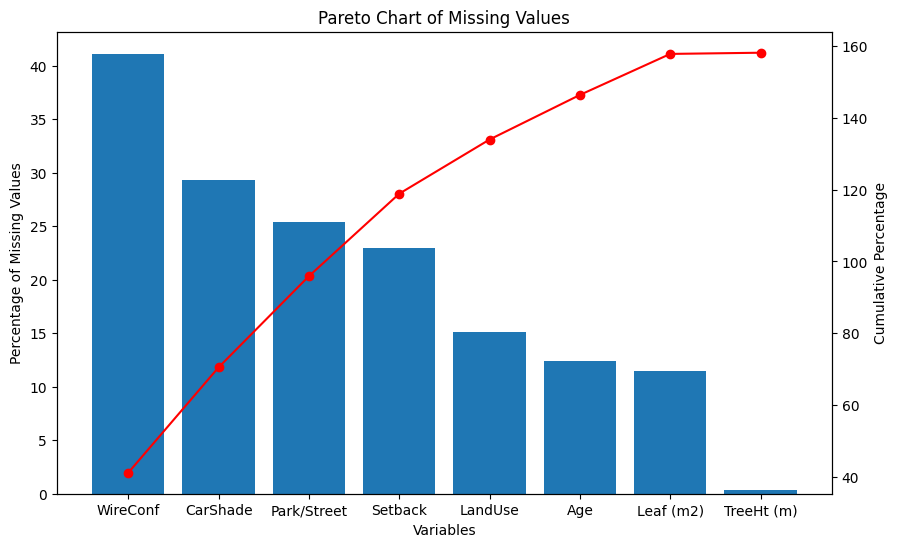

In [10]:
#pareto chart percent_missing, ignore TreeType, Region, DbaseID, DBH (cm)
sorted_percent_missing = percent_missing.sort_values(ascending=False)

# remove 'TreeType', 'Region', 'DbaseID', 'DBH (cm)' from the sorted list
sorted_percent_missing = sorted_percent_missing[~sorted_percent_missing.index.isin(['TreeType', 'Region', 'DbaseID', 'DBH (cm)'])]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(sorted_percent_missing.index, sorted_percent_missing.values)
ax.set_xlabel("Variables")
ax.set_ylabel("Percentage of Missing Values")
ax.set_title("Pareto Chart of Missing Values")

cumulative_percentage = sorted_percent_missing.cumsum()

ax2 = ax.twinx()
ax2.plot(sorted_percent_missing.index, cumulative_percentage, color='red', marker='o')
ax2.set_ylabel("Cumulative Percentage")

plt.xticks(rotation=90)

plt.show()


In [11]:
rows_with_na = df[df['Park/Street'].isna() | df['Age'].isna() | df['Setback'].isna() | df['CarShade'].isna() | df['LandUse'].isna() | df['WireConf'].isna()]
rows_with_na

,DbaseID,Region,Park/Street,TreeType,Age,DBH (cm),TreeHt (m),Leaf (m2),Setback,CarShade,LandUse,WireConf
0,1,InlVal,Nursery,BDL,0.00,2.50,2.00,2.50,NaN,NaN,NaN,NaN
1,2,InlVal,Nursery,BDM,0.00,2.50,1.50,1.90,NaN,NaN,NaN,NaN
2,3,InlVal,Nursery,BDL,0.00,2.50,1.80,2.20,NaN,NaN,NaN,NaN
3,4,InlVal,Nursery,BEM,0.00,2.50,2.00,2.00,NaN,NaN,NaN,NaN
4,5,InlVal,Nursery,BDM,0.00,2.50,2.00,2.20,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14482,17990,SacVal,Street,BDL,62.00,110.50,26.00,3497.60,NaN,NaN,1.00,NaN
14483,17991,SacVal,Street,BDL,60.00,114.30,25.00,1236.60,NaN,NaN,2.00,NaN
14484,17992,SacVal,Street,BDL,56.00,123.90,29.00,3162.60,NaN,NaN,1.00,NaN
14485,17993,SacVal,Street,BDL,64.00,132.10,22.00,938.40,NaN,NaN,5.00,NaN


In [12]:
rows_with_na_table = rows_with_na[['Region']].value_counts().reset_index(name='Count')
rows_with_na_table


,Region,Count
0,SacVal,1001
1,PacfNW,994
2,NoCalC,912
3,InlEmp,888
4,LoMidW,877
5,NMtnPr,867
6,NoEast,827
7,MidWst,760
8,InlVal,634
9,SoCalC,627


In [13]:
#calculate proportion of each Region missing
missing_by_region = df.groupby('Region').apply(lambda x: x.isnull().sum() / len(x)).mean(axis=1)

missing_by_region


/tmp/ipython-input-1454315722.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_region = df.groupby('Region').apply(lambda x: x.isnull().sum() / len(x)).mean(axis=1)


,0
Region,
CenFla,0.02
GulfCo,0.03
InlEmp,0.41
InlVal,0.41
InterW,0.00
LoMidW,0.17
MidWst,0.09
NMtnPr,0.11
NoCalC,0.12


In [14]:
rows_with_na_table = rows_with_na[['WireConf']].value_counts().reset_index(name='Count')
rows_with_na_table

,WireConf,Count
0,0.00,1672
1,2.00,508
2,3.00,286
3,1.00,64


## Data Cleaning

In [15]:
df.describe()

,DbaseID,Age,DBH (cm),TreeHt (m),Leaf (m2),Setback,CarShade,LandUse,WireConf
count,14487.00,12687.00,14487.00,14439.00,12831.00,11159.00,10233.00,12300.00,8528.00
mean,7810.00,30.00,42.91,12.27,341.65,2.71,0.69,2.08,0.64
std,4821.55,22.65,29.67,6.92,505.74,1.14,1.09,1.49,1.05
min,1.00,0.00,0.50,0.50,0.10,1.00,0.00,1.00,0.00
25%,3622.50,14.00,19.30,7.00,34.35,2.00,0.00,1.00,0.00
50%,7905.00,25.00,37.60,11.00,155.40,3.00,0.00,1.00,0.00
75%,11526.50,40.00,60.20,16.50,444.70,4.00,1.00,3.00,2.00
max,17994.00,350.00,304.80,51.00,9516.00,4.00,7.00,6.00,3.00


In [16]:
print(percent_missing)

DbaseID        0.00
Region         0.00
Park/Street   25.41
TreeType       0.00
Age           12.42
DBH (cm)       0.00
TreeHt (m)     0.33
Leaf (m2)     11.43
Setback       22.97
CarShade      29.36
LandUse       15.10
WireConf      41.13
dtype: float64


### Tree Height (Response)

In [17]:
# listwise deletion if tree height =  na
df.dropna(subset=['TreeHt (m)'], inplace=True)

In [18]:
df.describe()

,DbaseID,Age,DBH (cm),TreeHt (m),Leaf (m2),Setback,CarShade,LandUse,WireConf
count,14439.00,12639.00,14439.00,14439.00,12827.00,11155.00,10228.00,12296.00,8524.00
mean,7822.33,30.05,42.99,12.27,341.72,2.71,0.69,2.08,0.64
std,4823.76,22.59,29.63,6.92,505.79,1.14,1.10,1.49,1.05
min,1.00,0.00,0.50,0.50,0.10,1.00,0.00,1.00,0.00
25%,3638.50,14.00,19.40,7.00,34.40,2.00,0.00,1.00,0.00
50%,7926.00,25.00,37.60,11.00,155.50,3.00,0.00,1.00,0.00
75%,11538.50,40.00,60.20,16.50,444.80,4.00,1.00,3.00,2.00
max,17994.00,350.00,304.80,51.00,9516.00,4.00,7.00,6.00,3.00


### Park/Street

In [19]:
df['Park/Street'].value_counts()

,count
Park/Street,
Street,8984
Park,1522
Nursery,238
PARK,15


In [20]:
#print average age for park/street
average_age_by_park_street = df.groupby('Park/Street')['Age'].mean()

average_age_by_park_street


,Age
Park/Street,
Nursery,1.22
PARK,15.13
Park,28.69
Street,32.65


In [21]:
#change all PARK to Park in Park/Street, count Regional Big Tree
df['Park/Street'] = df['Park/Street'].str.replace('PARK', 'Park', regex=False)

regional_big_tree_count = df[df['Park/Street'] == 'Regional Big Tree'].shape[0]

print(f"Number of Regional Big Tree trees: {regional_big_tree_count}")

df['Park/Street'] = df['Park/Street'].str.replace('Regional Big Tree', 'Park', regex=False)

Number of Regional Big Tree trees: 0


In [22]:
#if Age < 2, assign nas in Park/Street Nursery
df.loc[(df['Age'] < 2) & (df['Park/Street'].isnull()), 'Park/Street'] = 'Nursery'


In [23]:
df['Park/Street'].value_counts()

,count
Park/Street,
Street,8984
Park,1537
Nursery,337


In [24]:
#for missing Park/Street, impute from the last available value
df['Park/Street'] = df['Park/Street'].fillna(method='ffill')

/tmp/ipython-input-1495225680.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Park/Street'] = df['Park/Street'].fillna(method='ffill')


In [25]:
df['Park/Street'].value_counts()

,count
Park/Street,
Street,8984
Nursery,3918
Park,1537


In [26]:
#if age >2 and 'Nursery' assign Park/Street =Park
df.loc[(df['Age'] > 2) & (df['Park/Street'] == 'Nursery'), 'Park/Street'] = 'Park'

In [27]:
df['Park/Street'].value_counts()

,count
Park/Street,
Street,8984
Park,4235
Nursery,1220


In [28]:
#count missing in Park/Street
#missing_park_street = df_filled['Park/Street'].isnull().sum()
#print(f"Number of missing values in 'Park/Street': {missing_park_street}")


In [29]:
df.describe()

,DbaseID,Age,DBH (cm),TreeHt (m),Leaf (m2),Setback,CarShade,LandUse,WireConf
count,14439.00,12639.00,14439.00,14439.00,12827.00,11155.00,10228.00,12296.00,8524.00
mean,7822.33,30.05,42.99,12.27,341.72,2.71,0.69,2.08,0.64
std,4823.76,22.59,29.63,6.92,505.79,1.14,1.10,1.49,1.05
min,1.00,0.00,0.50,0.50,0.10,1.00,0.00,1.00,0.00
25%,3638.50,14.00,19.40,7.00,34.40,2.00,0.00,1.00,0.00
50%,7926.00,25.00,37.60,11.00,155.50,3.00,0.00,1.00,0.00
75%,11538.50,40.00,60.20,16.50,444.80,4.00,1.00,3.00,2.00
max,17994.00,350.00,304.80,51.00,9516.00,4.00,7.00,6.00,3.00


### WireConf

In [30]:
# Change 0, 1, 3 to 0 in WireConf
df['WireConf'] = df['WireConf'].replace([0, 1, 3], 0)

# Change 2 to 1 in WireConf
df['WireConf'] = df['WireConf'].replace(2, 1)

In [31]:
df['WireConf'].value_counts()

,count
WireConf,
0.00,7197
1.00,1327


In [32]:
sum_na_wireconf = df['WireConf'].isna().sum()

print(f"Sum of NaN values in 'WireConf': {sum_na_wireconf}")

Sum of NaN values in 'WireConf': 5915


In [33]:
#count WireConfig by Park/Street
wireconf_by_parkstreet = df.groupby(['Park/Street', 'WireConf'])['WireConf'].count().unstack()

wireconf_by_parkstreet


WireConf,0.00,1.00
Park/Street,,
Nursery,875,116
Park,1799,129
Street,4523,1082


In [34]:
#if Park/Street = Nursery or Park and it is na, assign Wire Conf = 0
df.loc[(df['Park/Street'].isin(['Nursery', 'Park'])) & (df['WireConf'].isna()), 'WireConf'] = 0

In [35]:
#bfill all na values in WireConf
df['WireConf'] = df['WireConf'].fillna(method='bfill')


/tmp/ipython-input-3075959816.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['WireConf'] = df['WireConf'].fillna(method='bfill')


In [36]:
#ffill all na values in WireConf
df['WireConf'] = df['WireConf'].fillna(method='ffill')

/tmp/ipython-input-844608955.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['WireConf'] = df['WireConf'].fillna(method='ffill')


In [37]:
wireconf_by_parkstreet = df.groupby(['Park/Street', 'WireConf'])['WireConf'].count().unstack()

wireconf_by_parkstreet

WireConf,0.00,1.00
Park/Street,,
Nursery,1104,116
Park,4106,129
Street,7902,1082


In [38]:
#sum nas in WireConf
sum_na_wireconf = df['WireConf'].isna().sum()

print(f"Sum of NaN values in 'WireConf': {sum_na_wireconf}")


Sum of NaN values in 'WireConf': 0


## Hot Encode Categorical Vars

In [39]:
# Encode TreeType so that a regression can read it as categorical predictor
df = pd.get_dummies(df, columns=['TreeType'], prefix=['TreeType'])

In [40]:
df.head()

,DbaseID,Region,Park/Street,Age,DBH (cm),TreeHt (m),Leaf (m2),Setback,CarShade,LandUse,...,TreeType_BDS,TreeType_BEL,TreeType_BEM,TreeType_BES,TreeType_CEL,TreeType_CEM,TreeType_CES,TreeType_PEL,TreeType_PEM,TreeType_PES
0,1,InlVal,Nursery,0.00,2.50,2.00,2.50,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2,InlVal,Nursery,0.00,2.50,1.50,1.90,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,3,InlVal,Nursery,0.00,2.50,1.80,2.20,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,4,InlVal,Nursery,0.00,2.50,2.00,2.00,NaN,NaN,NaN,...,False,False,True,False,False,False,False,False,False,False
4,5,InlVal,Nursery,0.00,2.50,2.00,2.20,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [41]:
df['Region_Backup'] = df['Region']

In [42]:
#encode TreeType so that a regression can read it as categorical predictor
df = pd.get_dummies(df, columns=['Region'], prefix=['Region'])

In [43]:
df.head()

,DbaseID,Park/Street,Age,DBH (cm),TreeHt (m),Leaf (m2),Setback,CarShade,LandUse,WireConf,...,Region_NMtnPr,Region_NoCalC,Region_NoEast,Region_PacfNW,Region_Piedmt,Region_SWDsrt,Region_SacVal,Region_SoCalC,Region_TpIntW,Region_Tropic
0,1,Nursery,0.00,2.50,2.00,2.50,NaN,NaN,NaN,0.00,...,False,False,False,False,False,False,False,False,False,False
1,2,Nursery,0.00,2.50,1.50,1.90,NaN,NaN,NaN,0.00,...,False,False,False,False,False,False,False,False,False,False
2,3,Nursery,0.00,2.50,1.80,2.20,NaN,NaN,NaN,0.00,...,False,False,False,False,False,False,False,False,False,False
3,4,Nursery,0.00,2.50,2.00,2.00,NaN,NaN,NaN,0.00,...,False,False,False,False,False,False,False,False,False,False
4,5,Nursery,0.00,2.50,2.00,2.20,NaN,NaN,NaN,0.00,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df = pd.get_dummies(df, columns=['WireConf'], prefix=['WireConf'])

In [45]:
df.head()

,DbaseID,Park/Street,Age,DBH (cm),TreeHt (m),Leaf (m2),Setback,CarShade,LandUse,TreeType_BDL,...,Region_NoEast,Region_PacfNW,Region_Piedmt,Region_SWDsrt,Region_SacVal,Region_SoCalC,Region_TpIntW,Region_Tropic,WireConf_0.0,WireConf_1.0
0,1,Nursery,0.00,2.50,2.00,2.50,NaN,NaN,NaN,True,...,False,False,False,False,False,False,False,False,True,False
1,2,Nursery,0.00,2.50,1.50,1.90,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,True,False
2,3,Nursery,0.00,2.50,1.80,2.20,NaN,NaN,NaN,True,...,False,False,False,False,False,False,False,False,True,False
3,4,Nursery,0.00,2.50,2.00,2.00,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,True,False
4,5,Nursery,0.00,2.50,2.00,2.20,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,True,False


In [46]:
#Change all False to 0, True to 1 in df
df = df.replace({False: 0, True: 1})


/tmp/ipython-input-4040975032.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({False: 0, True: 1})


In [47]:
print(df.isna().sum())
print("================")
print()

DbaseID             0
Park/Street         0
Age              1800
DBH (cm)            0
TreeHt (m)          0
Leaf (m2)        1612
Setback          3284
CarShade         4211
LandUse          2143
TreeType_BDL        0
TreeType_BDM        0
TreeType_BDS        0
TreeType_BEL        0
TreeType_BEM        0
TreeType_BES        0
TreeType_CEL        0
TreeType_CEM        0
TreeType_CES        0
TreeType_PEL        0
TreeType_PEM        0
TreeType_PES        0
Region_Backup       0
Region_CenFla       0
Region_GulfCo       0
Region_InlEmp       0
Region_InlVal       0
Region_InterW       0
Region_LoMidW       0
Region_MidWst       0
Region_NMtnPr       0
Region_NoCalC       0
Region_NoEast       0
Region_PacfNW       0
Region_Piedmt       0
Region_SWDsrt       0
Region_SacVal       0
Region_SoCalC       0
Region_TpIntW       0
Region_Tropic       0
WireConf_0.0        0
WireConf_1.0        0
dtype: int64



## Re 'Grow' ssion

In [48]:
print(df.dtypes)
print("================")
print()

DbaseID            int64
Park/Street       object
Age              float64
DBH (cm)         float64
TreeHt (m)       float64
Leaf (m2)        float64
Setback          float64
CarShade         float64
LandUse          float64
TreeType_BDL       int64
TreeType_BDM       int64
TreeType_BDS       int64
TreeType_BEL       int64
TreeType_BEM       int64
TreeType_BES       int64
TreeType_CEL       int64
TreeType_CEM       int64
TreeType_CES       int64
TreeType_PEL       int64
TreeType_PEM       int64
TreeType_PES       int64
Region_Backup     object
Region_CenFla      int64
Region_GulfCo      int64
Region_InlEmp      int64
Region_InlVal      int64
Region_InterW      int64
Region_LoMidW      int64
Region_MidWst      int64
Region_NMtnPr      int64
Region_NoCalC      int64
Region_NoEast      int64
Region_PacfNW      int64
Region_Piedmt      int64
Region_SWDsrt      int64
Region_SacVal      int64
Region_SoCalC      int64
Region_TpIntW      int64
Region_Tropic      int64
WireConf_0.0       int64


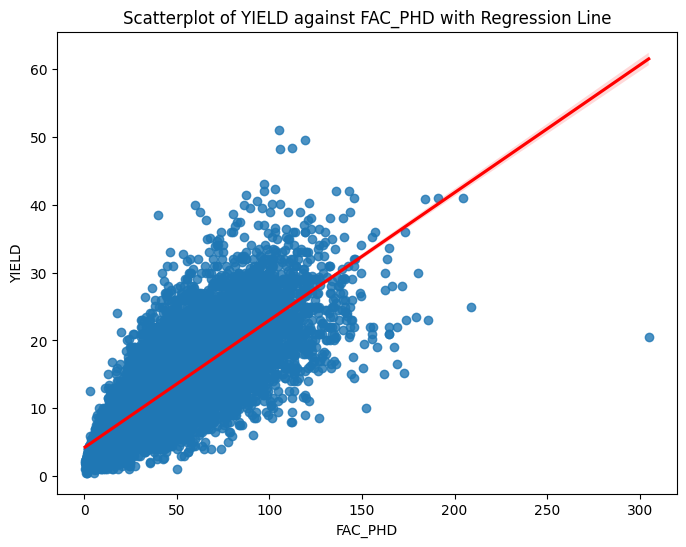

In [49]:
plt.figure(figsize=(8, 6))
sns.regplot(x='DBH (cm)', y='TreeHt (m)', data=df, line_kws={'color': 'red'})
plt.xlabel('FAC_PHD')
plt.ylabel('YIELD')
plt.title('Scatterplot of YIELD against FAC_PHD with Regression Line')
plt.show()


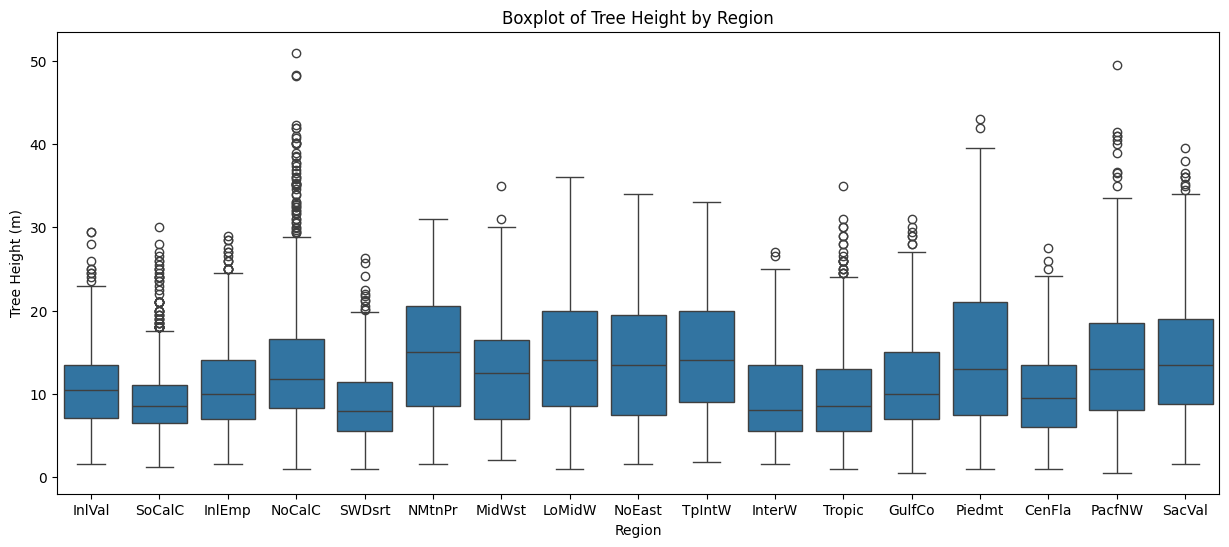

In [50]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Region_Backup', y='TreeHt (m)', data=df)
plt.xlabel('Region')
plt.ylabel('Tree Height (m)')
plt.title('Boxplot of Tree Height by Region')
plt.show()


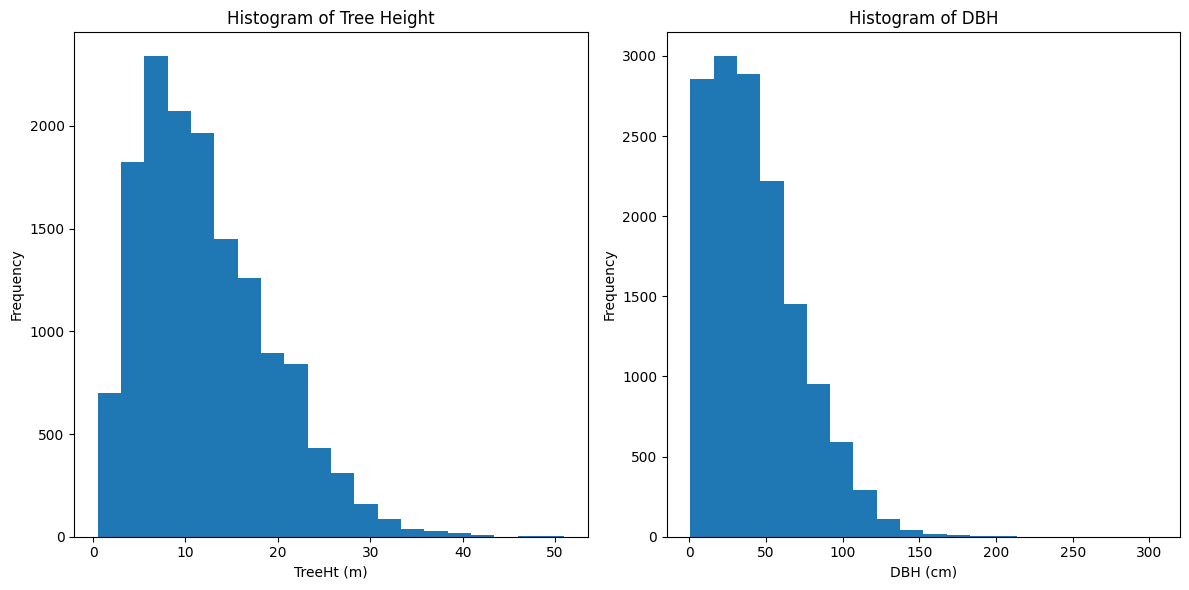

In [51]:
# Create histograms for 'TreeHt (m)' and 'DBH (cm)'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['TreeHt (m)'], bins=20)
plt.xlabel('TreeHt (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Tree Height')

plt.subplot(1, 2, 2)
plt.hist(df['DBH (cm)'], bins=20)
plt.xlabel('DBH (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of DBH')

plt.tight_layout()
plt.show()


In [52]:
# Remove outliers from TreeHt (m) and DBH (cm) using IQR method
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_filtered

df = remove_outliers_iqr(df, 'TreeHt (m)')
df = remove_outliers_iqr(df, 'DBH (cm)')

In [53]:
df.describe()

,DbaseID,Age,DBH (cm),TreeHt (m),Leaf (m2),Setback,CarShade,LandUse,TreeType_BDL,TreeType_BDM,...,Region_NoEast,Region_PacfNW,Region_Piedmt,Region_SWDsrt,Region_SacVal,Region_SoCalC,Region_TpIntW,Region_Tropic,WireConf_0.0,WireConf_1.0
count,14068.00,12325.00,14068.00,14068.00,12542.00,10863.00,9961.00,11931.00,14068.00,14068.00,...,14068.00,14068.00,14068.00,14068.00,14068.00,14068.00,14068.00,14068.00,14068.00,14068.00
mean,7771.61,28.94,40.96,11.84,312.97,2.71,0.68,2.08,0.41,0.17,...,0.06,0.07,0.06,0.06,0.07,0.04,0.06,0.06,0.91,0.09
std,4807.24,21.04,26.81,6.38,443.85,1.14,1.08,1.49,0.49,0.38,...,0.23,0.25,0.23,0.24,0.25,0.21,0.24,0.24,0.29,0.29
min,1.00,0.00,0.50,0.50,0.10,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3607.75,13.00,19.00,6.90,32.70,2.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,7886.50,25.00,36.70,11.00,148.10,3.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,11479.25,40.00,58.00,16.00,415.58,4.00,1.00,3.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,17991.00,115.00,119.20,30.70,9516.00,4.00,7.00,6.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [54]:
# Calculate descriptive statistics for DBH, Age, and TreeHt (m)
df[['DBH (cm)', 'Age', 'TreeHt (m)']].describe()

,DBH (cm),Age,TreeHt (m)
count,14068.00,12325.00,14068.00
mean,40.96,28.94,11.84
std,26.81,21.04,6.38
min,0.50,0.00,0.50
25%,19.00,13.00,6.90
50%,36.70,25.00,11.00
75%,58.00,40.00,16.00
max,119.20,115.00,30.70


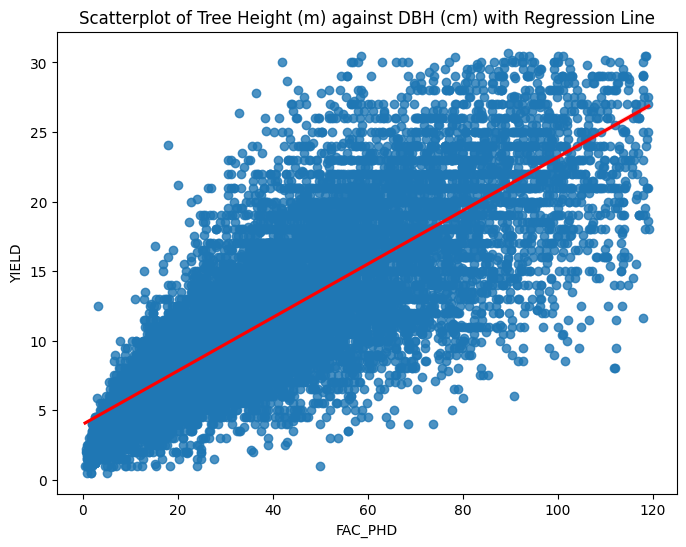

In [55]:
#Obtain a bivariate scatterplot
plt.figure(figsize=(8, 6))
sns.regplot(x='DBH (cm)', y='TreeHt (m)', data=df, line_kws={'color': 'red'})
plt.xlabel('FAC_PHD')
plt.ylabel('YIELD')
plt.title('Scatterplot of Tree Height (m) against DBH (cm) with Regression Line')
plt.show()

In [56]:
# Calculate correlation matrix
# Exclude columns with non-numeric data types
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()

# Calculate p-values
p_values = pd.DataFrame(np.zeros((len(numerical_cols), len(numerical_cols))), columns=numerical_cols, index=numerical_cols)

for row in numerical_cols:
    for col in numerical_cols:
        if row != col:  # Avoid self-correlation
            _, p = pearsonr(df[row], df[col])
            p_values.loc[row, col] = p

# Create masks for significant correlations
significance_mask1 = p_values < 0.01
significance_mask2 = p_values < 0.05

# Annotate significant correlations in the correlation matrix
annot_matrix = corr_matrix.round(2).astype(str)
for row in numerical_cols:
    for col in numerical_cols:
        if row != col:  # Avoid self-correlation
            if significance_mask1.loc[row, col]:
                annot_matrix.loc[row, col] += '**'
            elif significance_mask2.loc[row, col]:
                annot_matrix.loc[row, col] += '*'

# Display the annotated correlation matrix
print("Bivariate Correlations")
print(annot_matrix)
print("** p_values < 0.01, * p_values < 0.05")

Bivariate Correlations
               DbaseID    Age DBH (cm) TreeHt (m) Leaf (m2) Setback CarShade  \
DbaseID            1.0   0.01   0.06**     0.07**       0.1    0.06     0.09   
Age               0.01    1.0      0.8       0.65      0.56   -0.11     0.08   
DBH (cm)        0.06**    0.8      1.0     0.81**      0.71   -0.11     0.15   
TreeHt (m)      0.07**   0.65   0.81**        1.0      0.71    -0.1     0.21   
Leaf (m2)          0.1   0.56     0.71       0.71       1.0   -0.06      0.2   
Setback           0.06  -0.11    -0.11       -0.1     -0.06     1.0     -0.0   
CarShade          0.09   0.08     0.15       0.21       0.2    -0.0      1.0   
LandUse           -0.0  -0.08    -0.11      -0.13     -0.11    0.47    -0.17   
TreeType_BDL    0.06**   0.15   0.22**     0.36**      0.32   -0.07     0.12   
TreeType_BDM   -0.05**  -0.13  -0.11**    -0.07**     -0.05   -0.03    -0.07   
TreeType_BDS    0.07**  -0.11  -0.18**    -0.27**     -0.17   -0.01     0.08   
TreeType_BEL    0

In [57]:
# Define the dependent variable
y = df['TreeHt (m)']

# Define the independent variables
X2 = df[['DBH (cm)', 'TreeType_BDL', 'TreeType_BDM', 'TreeType_BDS', 'TreeType_BEL', 'TreeType_BEM',
         'TreeType_BES', 'TreeType_CEL', 'TreeType_CEM', 'TreeType_CES', 'TreeType_PEL', 'TreeType_PEM',
         'TreeType_PES', 'Region_CenFla', 'Region_GulfCo', 'Region_InlEmp', 'Region_InlVal', 'Region_InterW',
         'Region_LoMidW', 'Region_MidWst', 'Region_NMtnPr', 'Region_NoCalC', 'Region_NoEast', 'Region_PacfNW',
         'Region_Piedmt', 'Region_SWDsrt', 'Region_SacVal', 'Region_SoCalC', 'Region_TpIntW', 'Region_Tropic',
         'WireConf_0.0', 'WireConf_1.0']]

# Add a constant to the independent variables (this adds the intercept term)
X2 = sm.add_constant(X2)

# Fit the regression model
model2 = sm.OLS(y, X2).fit()

# get a summary of the regression models
print('\nModel with multiple predictors:', model2.summary())


Model with multiple predictors:                             OLS Regression Results                            
Dep. Variable:             TreeHt (m)   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     1359.
Date:                Sun, 15 Feb 2026   Prob (F-statistic):               0.00
Time:                        03:09:21   Log-Likelihood:                -36636.
No. Observations:               14068   AIC:                         7.333e+04
Df Residuals:                   14038   BIC:                         7.356e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const        

In [58]:
# Define the dependent variable
y = df['TreeHt (m)']

# Define the independent variables
X2 = df[['DBH (cm)', 'TreeType_BDL', 'TreeType_BDM', 'TreeType_BDS', 'TreeType_BEL', 'TreeType_BEM',
         'TreeType_BES', 'TreeType_CEL', 'TreeType_CEM', 'TreeType_CES', 'TreeType_PEL', 'TreeType_PEM', 'Region_CenFla', 'Region_GulfCo', 'Region_InterW',
         'Region_MidWst', 'Region_NMtnPr', 'Region_NoCalC', 'Region_PacfNW',
         'Region_Piedmt', 'Region_SWDsrt', 'Region_SacVal', 'Region_SoCalC', 'Region_TpIntW', 'Region_Tropic',
         'WireConf_0.0', 'WireConf_1.0']]

# Add a constant to the independent variables (this adds the intercept term)
X2 = sm.add_constant(X2)

# Fit the regression model
model2 = sm.OLS(y, X2).fit()

# get a summary of the regression models
print('\nModel with multiple predictors:', model2.summary())



Model with multiple predictors:                             OLS Regression Results                            
Dep. Variable:             TreeHt (m)   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     1516.
Date:                Sun, 15 Feb 2026   Prob (F-statistic):               0.00
Time:                        03:09:21   Log-Likelihood:                -36637.
No. Observations:               14068   AIC:                         7.333e+04
Df Residuals:                   14041   BIC:                         7.353e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const        

In [59]:
# Define the dependent variable
y = df['TreeHt (m)']

# Define the independent variables
X2 = df[['DBH (cm)', 'TreeType_BDL', 'TreeType_BDM', 'TreeType_BDS', 'TreeType_BEM',
         'TreeType_BES', 'TreeType_CEL', 'TreeType_CEM', 'TreeType_CES', 'TreeType_PEL', 'TreeType_PEM', 'Region_CenFla', 'Region_GulfCo', 'Region_InterW',
         'Region_MidWst', 'Region_NMtnPr', 'Region_NoCalC', 'Region_PacfNW',
         'Region_Piedmt', 'Region_SWDsrt', 'Region_SacVal', 'Region_SoCalC', 'Region_TpIntW', 'Region_Tropic',
         'WireConf_0.0', 'WireConf_1.0']]

# Add a constant to the independent variables (this adds the intercept term)
X2 = sm.add_constant(X2)

# Fit the regression model
model2 = sm.OLS(y, X2).fit()

# get a summary of the regression models
print('\nModel with multiple predictors:', model2.summary())


Model with multiple predictors:                             OLS Regression Results                            
Dep. Variable:             TreeHt (m)   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     1577.
Date:                Sun, 15 Feb 2026   Prob (F-statistic):               0.00
Time:                        03:09:22   Log-Likelihood:                -36637.
No. Observations:               14068   AIC:                         7.333e+04
Df Residuals:                   14042   BIC:                         7.352e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const        

## Re 'Grow' ssion  Validation

In [60]:
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X2.columns
vif_data["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

# Calculate Tolerance for each predictor
vif_data["Tolerance"] = 1 / vif_data["VIF"]

# Drop the constant term
vif_data = vif_data.drop(0)

# Print the result
print("Tolerance and VIF values:")
print(vif_data)


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Tolerance and VIF values:
          Feature  VIF  Tolerance
1        DBH (cm) 1.14       0.88
2    TreeType_BDL 3.96       0.25
3    TreeType_BDM 2.73       0.37
4    TreeType_BDS 2.20       0.45
5    TreeType_BEM 1.72       0.58
6    TreeType_BES 1.44       0.70
7    TreeType_CEL 1.69       0.59
8    TreeType_CEM 1.26       0.79
9    TreeType_CES 1.15       0.87
10   TreeType_PEL 1.13       0.89
11   TreeType_PEM 1.11       0.90
12  Region_CenFla 1.31       0.77
13  Region_GulfCo 1.28       0.78
14  Region_InterW 1.22       0.82
15  Region_MidWst 1.19       0.84
16  Region_NMtnPr 1.24       0.81
17  Region_NoCalC 1.24       0.80
18  Region_PacfNW 1.30       0.77
19  Region_Piedmt 1.22       0.82
20  Region_SWDsrt 1.31       0.76
21  Region_SacVal 1.23       0.81
22  Region_SoCalC 1.41       0.71
23  Region_TpIntW 1.23       0.81
24  Region_Tropic 1.45       0.69
25   WireConf_0.0  inf       0.00
26   WireConf_1.0  inf       0.00


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


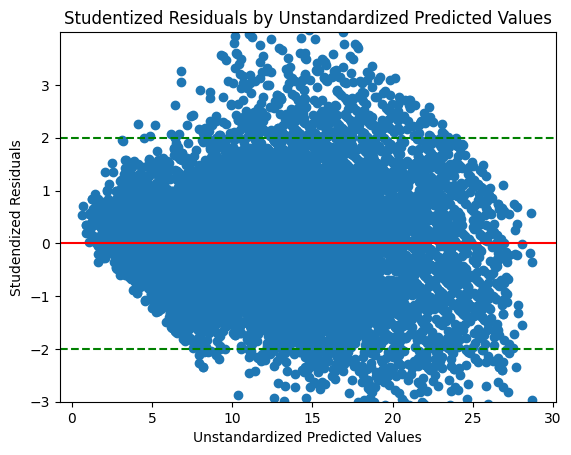

In [61]:
#Generate the unstandardized predicted values
X2 = sm.add_constant(X2)  # Adds a constant term to the predictors
model = sm.OLS(y, X2).fit()
df['predicted_score'] = model.predict(X2)

# Generate the studendized residuals
df['studentized_residuals'] = model.get_influence().resid_studentized_internal

# Create scatter plot of Studendized residuals by Unstandardized Predicted Values
plt.scatter(df['predicted_score'], df['studentized_residuals'], label='Data')
#plt.xlim(0, 1)
#plt.xticks(np.arange(850, 1120, 50))
plt.ylim(-3, 4)
plt.yticks(np.arange(-3, 4, 1))

plt.xlabel('Unstandardized Predicted Values')
plt.ylabel('Studendized Residuals')
plt.title('Studentized Residuals by Unstandardized Predicted Values')

# Add reference lines y=0, y=2, y=-2
plt.axhline(y=0, color='red', linestyle='-', label='Reference Line at y=0')
plt.axhline(y=2, color='green', linestyle='--', label='Reference Line at y=2')
plt.axhline(y=-2, color='green', linestyle='--', label='Reference Line at y=-2')

plt.show()

In [62]:
# Calculate Cook's D
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
df['Cooks_D'] = cooks_d

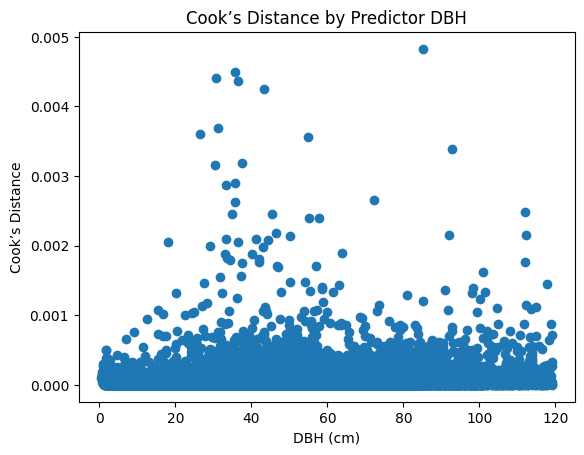

In [63]:
# Create a scatter plot of Cook’s Distance by Predictor EXPEND
plt.scatter(df['DBH (cm)'], df['Cooks_D'], label = 'Data')

#plt.ylim(0, 0.16)
#plt.yticks(np.arange(0, 0.16, 0.05))

# Add label and title
plt.xlabel('DBH (cm)')
plt.ylabel('Cook’s Distance')
plt.title('Cook’s Distance by Predictor DBH')

# Label each points
#for i in range(len(df)):
#   plt.annotate(df['DbaseID'][i], (df['DBH (cm)'][i], df['Cooks_D'][i]))

plt.show()

In [64]:
# Standardized residuals above 2 are considered outliers in this case
df['residuals'] = model.resid

# Add predicted values (fitted values) to the dataframe
df['predicted_values'] = model.fittedvalues

std_residuals = np.std(df['residuals'], ddof=3)

# Calculate the standardized residuals
df['standardized_residuals'] = df['residuals'] / std_residuals

outliers = df[np.abs(df['standardized_residuals']) > 2]
print("\n========== Outliers ===========")
print(outliers)


========== Outliers ===========
       DbaseID Park/Street   Age  DBH (cm)  TreeHt (m)  Leaf (m2)  Setback  \
106        107        Park 34.00     51.50        6.50      92.80      NaN   
112        113        Park 37.00     77.00        7.80    1280.70      NaN   
143        144        Park 33.00     63.00        9.00     510.40      NaN   
266        267        Park 33.00     39.00        6.00      67.00      NaN   
288        289        Park 46.00     54.70       23.00     370.70      NaN   
...        ...         ...   ...       ...         ...        ...      ...   
14355    17863      Street 20.00     60.20       24.00     208.10      NaN   
14397    17905      Street 28.00     36.70       19.60     875.10      NaN   
14438    17946      Street 52.00     95.70       12.20     570.90      NaN   
14472    17980      Street 50.00     74.00       12.00     613.80      NaN   
14476    17984      Street 50.00     83.50       11.00        NaN      NaN   

       CarShade  LandUse  Tree

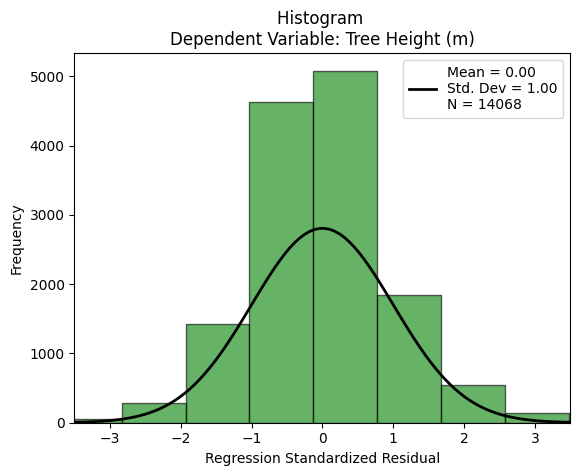

In [65]:
# The standardized_residuals was created in above analysis
# Calculate statistics
mean = np.mean(df['standardized_residuals'])
std_dev = np.std(df['standardized_residuals'])
n = len(df['standardized_residuals'])

# Set the number of bins as identified from SPSS
bins_std_res = 12

# Create histogram (with actual frequencies on y-axis)
plt.hist(df['standardized_residuals'], bins=bins_std_res, density=False, alpha=0.6, color='g', edgecolor='black')

# Set axis limits
plt.xlim(-3.5, 3.5)
plt.xticks(np.arange(-3, 3.5, 1))

# Generate x values for the normal curve
x = np.linspace(-3.5, 3.5, 100)

# Calculate the normal distribution curve (scaled to match the histogram's total frequency)
p = norm.pdf(x, mean, std_dev) * n * (6.0 / bins_std_res)  # scale the curve to the histogram

# Plot the normal distribution line
plt.plot(x, p, 'k', linewidth=2)

# Add legend with Mean, Std. Dev, and N
legend_text = f'Mean = {mean:.2f}\nStd. Dev = {std_dev:.2f}\nN = {n}'
plt.legend([legend_text], loc='upper right')

# Add labels and title
plt.title('Histogram \nDependent Variable: Tree Height (m)')
plt.xlabel('Regression Standardized Residual')
plt.ylabel('Frequency')

# Show plot
plt.show()

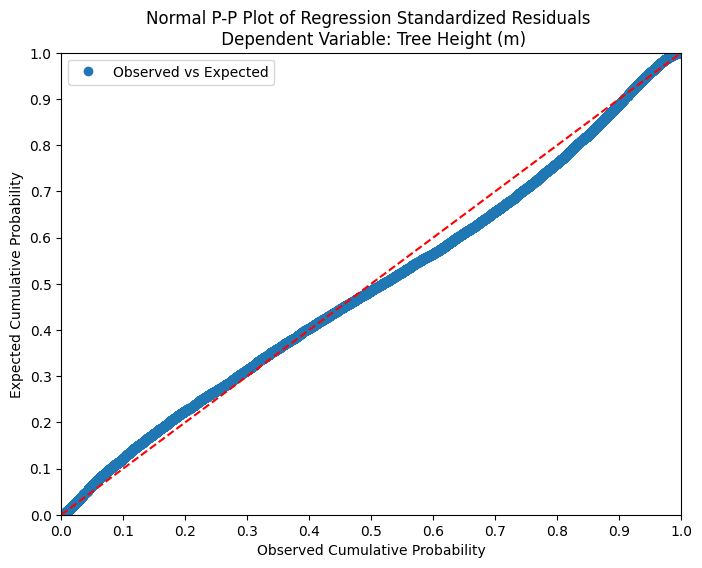

In [66]:
# The standardized_residuals was created in above analysis
standardized_residuals = df['standardized_residuals']

# Rank-order the standardized residuals
sorted_residuals = np.sort(standardized_residuals)

# Calculate the observed cumulative probabilities
observed_cumprob = np.arange(1, len(sorted_residuals) + 1) / len(sorted_residuals)

# Calculate the expected cumulative probabilities based on a normal distribution
expected_cumprob = norm.cdf(sorted_residuals)

# Plot the observed cumulative probabilities against the expected cumulative probabilities
plt.figure(figsize=(8, 6))
plt.plot(observed_cumprob, expected_cumprob, 'o', label="Observed vs Expected")
plt.plot([0, 1], [0, 1], 'r--')

# Set axis limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Add labels and title
plt.title('Normal P-P Plot of Regression Standardized Residuals \n Dependent Variable: Tree Height (m)')
plt.xlabel('Observed Cumulative Probability')
plt.ylabel('Expected Cumulative Probability')
plt.legend()

# Show the plot
plt.show()

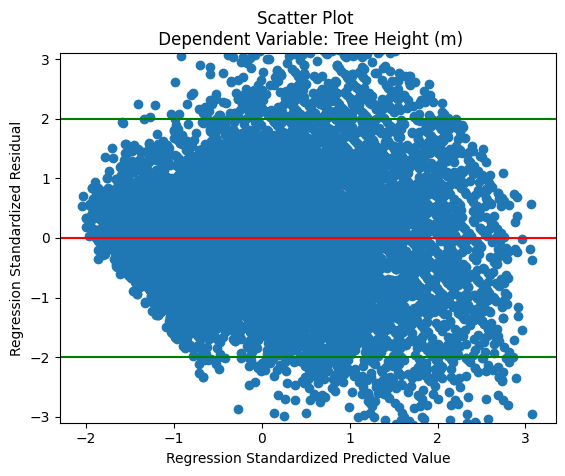

In [67]:
# Get the predicted values of y
df['predicted_y'] = model.predict(X2)

# Standardized predictied value of the dependent variable
df['standardized_predicted_y'] = zscore(df['predicted_y'])

# Create scatter plot of Studendized residuals and predicted values
plt.scatter(df['standardized_predicted_y'], df['standardized_residuals'], label='Data')
#plt.xlim(-2.2, 2.2)
#plt.xticks(np.arange(-2, 2.2, 1))
plt.ylim(-3.1, 3.1)
plt.yticks(np.arange(-3, 3.1, 1))

plt.xlabel('Regression Standardized Predicted Value')
plt.ylabel('Regression Standardized Residual')
plt.title('Scatter Plot \n Dependent Variable: Tree Height (m)')

# Add two reference lines
plt.axhline(y=2, color='green', linestyle='-')
plt.axhline(y=-2, color='green', linestyle='-')

# Add reference lines
plt.axhline(y=0, color='red', linestyle='-')

# Filter out the data points with standardized_residuals > 2
high_standardized = df[np.abs(df['standardized_residuals']) > 2]

plt.show()

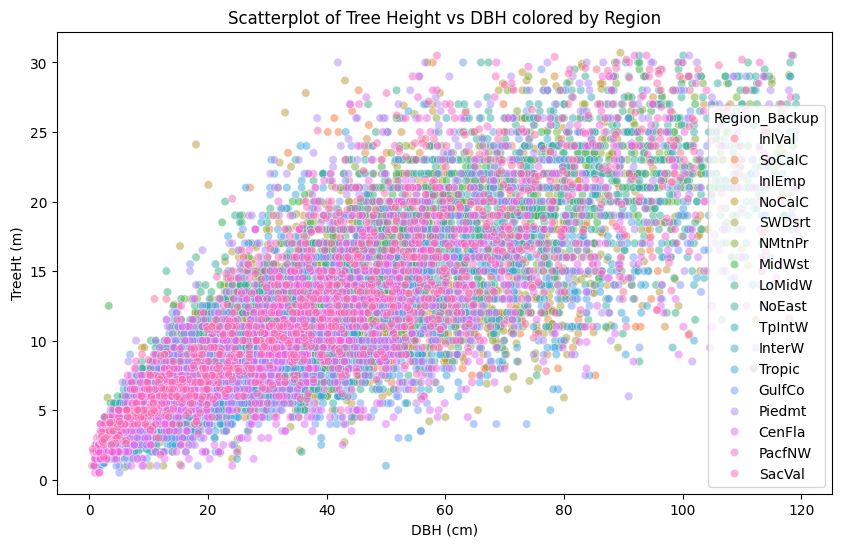

In [68]:
#scatterplot of TreeHt by DBH with Region Coding
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DBH (cm)', y='TreeHt (m)', hue='Region_Backup', data=df, alpha=0.5)
plt.xlabel('DBH (cm)')
plt.ylabel('TreeHt (m)')
plt.title('Scatterplot of Tree Height vs DBH colored by Region')
plt.show()


# Final Project Tree PCA & K-Means Clustering

## PCA

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for scaling
selected_cols = ['DBH (cm)', 'TreeType_BDL', 'TreeType_BDM', 'TreeType_BDS', 'TreeType_BEL', 'TreeType_BEM',
                 'TreeType_BES', 'TreeType_CEL', 'TreeType_CEM', 'TreeType_CES', 'TreeType_PEL', 'TreeType_PEM',
                 'TreeType_PES', 'Region_CenFla', 'Region_GulfCo', 'Region_InlEmp', 'Region_InlVal', 'Region_InterW',
                 'Region_LoMidW', 'Region_MidWst', 'Region_NMtnPr', 'Region_NoCalC', 'Region_NoEast', 'Region_PacfNW',
                 'Region_Piedmt', 'Region_SWDsrt', 'Region_SacVal', 'Region_SoCalC', 'Region_TpIntW', 'Region_Tropic']

df_numeric = df[selected_cols]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# To view the PCA components and explained variance
pca_components = pca.components_
explained_variance = pca.explained_variance_ratio_

In [70]:
# Define row and column names
row_names = ['DBH (cm)', 'TreeType_BDL', 'TreeType_BDM', 'TreeType_BDS', 'TreeType_BEL', 'TreeType_BEM',
                 'TreeType_BES', 'TreeType_CEL', 'TreeType_CEM', 'TreeType_CES', 'TreeType_PEL', 'TreeType_PEM',
                 'TreeType_PES', 'Region_CenFla', 'Region_GulfCo', 'Region_InlEmp', 'Region_InlVal', 'Region_InterW',
                 'Region_LoMidW', 'Region_MidWst', 'Region_NMtnPr', 'Region_NoCalC', 'Region_NoEast', 'Region_PacfNW',
                 'Region_Piedmt', 'Region_SWDsrt', 'Region_SacVal', 'Region_SoCalC', 'Region_TpIntW', 'Region_Tropic']
col_names = [f'Comp.{i+1}' for i in range(pca_components.shape[1])]

# Create a DataFrame
pca_df = pd.DataFrame(pca_components.T, index=row_names, columns=col_names)

# Output the DataFrame
pca_df

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.21,Comp.22,Comp.23,Comp.24,Comp.25,Comp.26,Comp.27,Comp.28,Comp.29,Comp.30
DBH (cm),0.26,-0.25,0.13,-0.13,0.01,-0.05,0.09,0.25,-0.31,-0.01,...,0.23,-0.22,0.27,0.15,-0.12,0.29,0.50,0.05,-0.00,-0.00
TreeType_BDL,0.62,-0.12,-0.04,-0.11,-0.00,-0.02,-0.14,-0.06,0.10,-0.04,...,0.11,0.13,-0.02,-0.20,0.09,0.02,-0.24,0.31,0.46,0.32
TreeType_BDM,-0.20,0.46,0.39,-0.21,0.01,-0.17,-0.04,-0.03,-0.10,0.06,...,0.21,-0.04,-0.12,0.24,-0.25,-0.30,0.14,0.09,0.35,0.24
TreeType_BDS,-0.10,0.25,-0.21,0.47,-0.12,0.30,-0.07,-0.08,-0.02,-0.02,...,-0.20,-0.01,0.27,0.13,-0.12,0.14,0.27,0.15,0.28,0.20
TreeType_BEL,-0.18,-0.41,0.43,0.28,0.07,0.04,-0.02,0.07,0.04,-0.01,...,-0.06,0.05,0.08,0.30,-0.13,0.23,-0.42,-0.28,0.25,0.17
TreeType_BEM,-0.23,-0.19,-0.14,-0.21,-0.37,-0.14,0.19,-0.07,0.01,-0.32,...,-0.08,-0.21,-0.27,-0.28,-0.16,0.04,0.07,-0.28,0.24,0.17
TreeType_BES,-0.21,-0.17,-0.27,-0.04,-0.01,-0.13,-0.34,-0.18,-0.08,0.26,...,0.28,0.18,0.08,-0.14,0.09,0.22,0.22,-0.30,0.18,0.12
TreeType_CEL,-0.05,-0.01,-0.12,0.00,-0.07,0.13,0.48,0.16,-0.01,0.38,...,-0.23,-0.28,-0.01,-0.21,0.05,0.02,-0.01,0.04,0.23,0.16
TreeType_CEM,-0.01,0.05,-0.13,0.18,0.22,-0.13,0.10,0.06,-0.28,-0.32,...,-0.24,0.06,-0.03,0.14,0.30,0.09,0.07,0.09,0.13,0.09
TreeType_CES,-0.07,0.07,-0.15,0.08,0.06,-0.27,-0.08,0.44,0.30,-0.02,...,-0.21,0.35,-0.33,0.12,0.10,0.05,0.23,-0.02,0.09,0.06


In [71]:
print("Urban Tree Components:")
pca.components_

Urban Tree Components:


array([[ 2.58139244e-01,  6.15505057e-01, -1.95423383e-01,
        -1.02546998e-01, -1.77578566e-01, -2.29488532e-01,
        -2.12508207e-01, -4.74608864e-02, -6.94656695e-03,
        -6.69348774e-02, -1.04292778e-01, -3.20309569e-02,
        -1.31424713e-01, -1.08587666e-01,  3.30387409e-02,
        -7.52984586e-02, -5.21641938e-02,  8.28111327e-02,
         1.67002689e-01,  7.54879992e-02,  2.08511951e-01,
        -9.13344622e-02,  1.73599162e-01, -5.19480564e-02,
         1.51156493e-02, -2.28356037e-01,  6.29407883e-02,
        -2.28595183e-01,  2.02380378e-01, -2.11120158e-01],
       [-2.52480076e-01, -1.15122284e-01,  4.60313916e-01,
         2.53733181e-01, -4.05998123e-01, -1.90473343e-01,
        -1.70285807e-01, -9.21431875e-03,  4.89321915e-02,
         6.64843390e-02, -7.61924571e-02, -2.20120094e-02,
        -4.62808703e-02, -3.91694132e-02, -7.98434451e-02,
        -1.07341330e-01,  1.73880127e-01,  1.10912100e-01,
         8.41627387e-03,  1.68490164e-01, -5.68285591e-

In [72]:
print("Urban Tree Eigen:")
pca.explained_variance_

Urban Tree Eigen:


array([2.02214413e+00, 1.61305614e+00, 1.41004537e+00, 1.36530323e+00,
       1.32431939e+00, 1.26739586e+00, 1.25263718e+00, 1.16661883e+00,
       1.14251364e+00, 1.12136087e+00, 1.09938347e+00, 1.07634543e+00,
       1.06772861e+00, 1.06475071e+00, 1.06280645e+00, 1.05343373e+00,
       1.02818564e+00, 9.99845825e-01, 9.88979480e-01, 9.44240740e-01,
       9.00651621e-01, 8.77911552e-01, 8.46470255e-01, 7.87811927e-01,
       7.56615129e-01, 7.19761260e-01, 6.40941305e-01, 4.00874870e-01,
       9.55497518e-17, 0.00000000e+00])

In [73]:
import numpy as np
# SS Loadings (Eigenvalues)
sd = np.sqrt(pca.explained_variance_)

# Proportion of Variance explained by each component
proportion_var = pca.explained_variance_ratio_

# Cumulative Variance
cumulative_var = np.cumsum(proportion_var)
pca_info = np.column_stack((sd, proportion_var, cumulative_var))

# Organize this information into a DataFrame for better readability
row_names = ['Standard deviation', 'Proportion of Variance', 'Cumulative Variance']
col_names = [f'Comp.{i+1}' for i in range(pca_components.shape[1])]

# Create a DataFrame
pca_info_df = pd.DataFrame(pca_info.T, index=row_names, columns=col_names)

print("Importance of components:")
pca_info_df

Importance of components:


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.21,Comp.22,Comp.23,Comp.24,Comp.25,Comp.26,Comp.27,Comp.28,Comp.29,Comp.30
Standard deviation,1.42,1.27,1.19,1.17,1.15,1.13,1.12,1.08,1.07,1.06,...,0.95,0.94,0.92,0.89,0.87,0.85,0.80,0.63,0.00,0.00
Proportion of Variance,0.07,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.04,0.04,...,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.01,0.00,0.00
Cumulative Variance,0.07,0.12,0.17,0.21,0.26,0.30,0.34,0.38,0.42,0.46,...,0.83,0.86,0.89,0.92,0.94,0.97,0.99,1.00,1.00,1.00


In [74]:
# Apply the cutoff to display values only above the threshold
cutoff = 0.001
filtered_loadings = pca_df.applymap(lambda x: x if abs(x) >= cutoff else 0)
pcascore = filtered_loadings
eigenvalues = pca.explained_variance_
componentSPSS = pcascore.div(np.sqrt(eigenvalues), axis=0)
cutoff = 0.001
componentSPSS = componentSPSS.applymap(lambda x: x if abs(x) >= cutoff else 0)
# Display the adjusted loadings with the cutoff applied
print("Component score coefficients in SPSS:")
componentSPSS

Component score coefficients in SPSS:


/tmp/ipython-input-2073883753.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_loadings = pca_df.applymap(lambda x: x if abs(x) >= cutoff else 0)
/tmp/ipython-input-2073883753.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  componentSPSS = componentSPSS.applymap(lambda x: x if abs(x) >= cutoff else 0)


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.21,Comp.22,Comp.23,Comp.24,Comp.25,Comp.26,Comp.27,Comp.28,Comp.29,Comp.30
DBH (cm),0.18,-0.18,0.09,-0.09,0.01,-0.03,0.06,0.17,-0.22,-0.01,...,0.16,-0.16,0.19,0.10,-0.08,0.20,0.35,0.04,0.00,0.00
TreeType_BDL,0.48,-0.09,-0.03,-0.09,-0.00,-0.01,-0.11,-0.04,0.08,-0.03,...,0.09,0.10,-0.02,-0.16,0.07,0.02,-0.19,0.25,0.36,0.25
TreeType_BDM,-0.16,0.39,0.33,-0.18,0.01,-0.14,-0.03,-0.02,-0.08,0.05,...,0.17,-0.03,-0.10,0.20,-0.21,-0.26,0.12,0.08,0.30,0.21
TreeType_BDS,-0.09,0.22,-0.18,0.40,-0.10,0.25,-0.06,-0.07,-0.01,-0.01,...,-0.17,-0.01,0.23,0.11,-0.10,0.12,0.23,0.12,0.24,0.17
TreeType_BEL,-0.15,-0.35,0.37,0.25,0.06,0.03,-0.02,0.06,0.04,-0.01,...,-0.05,0.04,0.07,0.26,-0.11,0.20,-0.37,-0.25,0.21,0.15
TreeType_BEM,-0.20,-0.17,-0.13,-0.18,-0.33,-0.12,0.17,-0.06,0.01,-0.28,...,-0.07,-0.19,-0.24,-0.25,-0.14,0.03,0.06,-0.25,0.21,0.15
TreeType_BES,-0.19,-0.15,-0.24,-0.04,-0.01,-0.12,-0.31,-0.16,-0.07,0.23,...,0.25,0.16,0.07,-0.13,0.08,0.19,0.20,-0.27,0.16,0.11
TreeType_CEL,-0.04,-0.01,-0.11,0.00,-0.06,0.12,0.44,0.15,-0.01,0.35,...,-0.21,-0.26,-0.01,-0.19,0.05,0.02,-0.01,0.04,0.21,0.14
TreeType_CEM,-0.01,0.05,-0.13,0.17,0.21,-0.12,0.10,0.05,-0.26,-0.30,...,-0.23,0.06,-0.02,0.13,0.28,0.09,0.06,0.08,0.12,0.08
TreeType_CES,-0.06,0.06,-0.14,0.07,0.06,-0.25,-0.08,0.41,0.28,-0.02,...,-0.20,0.33,-0.31,0.12,0.10,0.04,0.22,-0.02,0.09,0.06


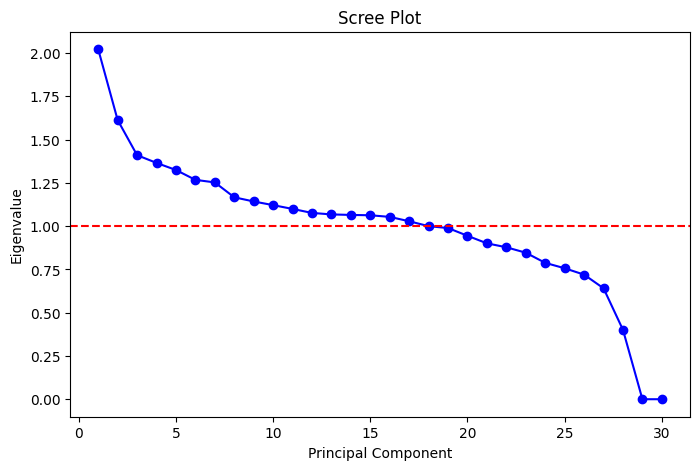

In [75]:
import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')

# Add a horizontal line at y = 1
plt.axhline(y=1, color='r', linestyle='--')

# Show the plot
plt.show()

Kaiser Rule! Here we keep components 1-18 (19 maybe...).

In [76]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=981f8be317550621bf6ea03e7db7325b394a9738ebf1db19249a798d516c0f86
  Stored in directory: /root/.cache/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor_analyzer


Component | Unadjusted Eigenvalue | Adjusted Eigenvalue | Estimated Bias
        1 |               2.0221 |            1.9373 |         0.0848
        2 |               1.6131 |            1.5383 |         0.0747
        3 |               1.4100 |            1.3434 |         0.0667


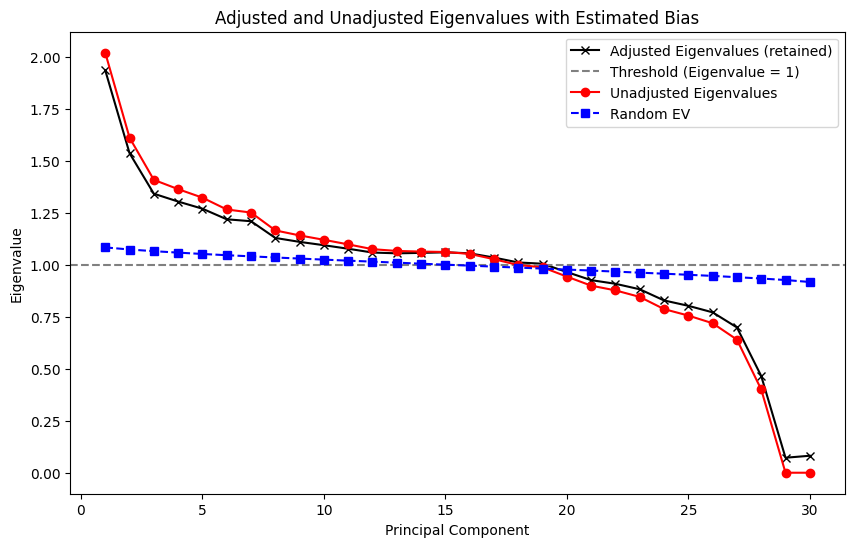

Suggested number of components to retain: 19


In [77]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = df_scaled

# Step 1: Run PCA on the actual data
pca = PCA()
pca.fit(data)
actual_eigenvalues = pca.explained_variance_

# Step 2: Generate random eigenvalues (Parallel Analysis)
n_components = data.shape[1]
n_samples = data.shape[0]
n_iterations = 500  # Number of random datasets

random_eigenvalues = np.zeros((n_iterations, n_components))
for i in range(n_iterations):
    random_data = np.apply_along_axis(np.random.permutation, 0, data)
    pca_random = PCA()
    pca_random.fit(random_data)
    random_eigenvalues[i, :] = pca_random.explained_variance_

# Step 3: Calculate the mean of the random eigenvalues to estimate bias
mean_random_eigenvalues = np.mean(random_eigenvalues, axis=0)
estimated_bias = mean_random_eigenvalues-1

# Step 4: Calculate the adjusted eigenvalues by subtracting the estimated bias
adjusted_eigenvalues = actual_eigenvalues - estimated_bias

# Print the adjusted and unadjusted eigenvalues, and the estimated bias
print("Component | Unadjusted Eigenvalue | Adjusted Eigenvalue | Estimated Bias")
for i in range(3):
    print(f"{i+1:>9} | {actual_eigenvalues[i]:>20.4f} | {adjusted_eigenvalues[i]:>17.4f} | {estimated_bias[i]:>14.4f}")

# Step 5: Plot actual, adjusted, and mean random eigenvalues for comparison
plt.figure(figsize=(10, 6))
components = range(1, n_components + 1)
plt.plot(components, adjusted_eigenvalues, marker='x', linestyle='-', label="Adjusted Eigenvalues (retained)", color="black")
plt.axhline(y=1, color='grey', linestyle='--', label="Threshold (Eigenvalue = 1)")
plt.plot(components, actual_eigenvalues, marker='o', linestyle='-', label="Unadjusted Eigenvalues", color="red")
plt.plot(components, mean_random_eigenvalues, marker='s', linestyle='--', label="Random EV", color="blue")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Adjusted and Unadjusted Eigenvalues with Estimated Bias")
plt.legend()
plt.show()

# Suggest number of components to retain
percentile_95_random_eigenvalues = np.percentile(random_eigenvalues, 95, axis=0)
suggested_components = np.sum(actual_eigenvalues > percentile_95_random_eigenvalues)
print(f"Suggested number of components to retain: {suggested_components}")

Explained Variance, we want the components to explain at least 70% or 80% of the total sample variance. We want to keep 19 or so components.

In [78]:
# Keep only the first 19 principal components
n_components_to_keep = 19
df_pca_reduced = pd.DataFrame(df_pca[:, :n_components_to_keep], index=df.index)

# Display the first few rows of the new DataFrame
print(df_pca_reduced.head())

# Display the shape of the new DataFrame
print("\nShape of the new DataFrame:", df_pca_reduced.shape)

     0    1    2     3     4     5     6     7    8     9     10    11    12  \
0  0.45 0.98 0.59 -0.47 -0.60 -0.52 -0.29 -1.54 0.84 -0.11 -0.83 -0.94 -0.09   
1 -1.32 2.43 1.69 -0.81 -0.58 -0.92 -0.12 -1.50 0.37  0.15 -1.06 -0.88 -0.11   
2  0.45 0.98 0.59 -0.47 -0.60 -0.52 -0.29 -1.54 0.84 -0.11 -0.83 -0.94 -0.09   
3 -1.69 0.47 0.11 -1.04 -2.03 -1.01  0.72 -1.69 0.69 -1.24 -0.18 -1.14 -0.06   
4 -1.32 2.43 1.69 -0.81 -0.58 -0.92 -0.12 -1.50 0.37  0.15 -1.06 -0.88 -0.11   

     13    14   15    16    17    18  
0 -0.02 -0.12 3.39 -0.65 -0.47 -0.13  
1 -0.05 -0.13 3.42 -0.25 -0.46  0.11  
2 -0.02 -0.12 3.39 -0.65 -0.47 -0.13  
3  0.03 -0.09 3.42 -1.75 -0.58  0.25  
4 -0.05 -0.13 3.42 -0.25 -0.46  0.11  

Shape of the new DataFrame: (14068, 19)


In [79]:
# Apply the cutoff to display values only above the threshold
cutoff = 0.001
filtered_loadings = pca_df.applymap(lambda x: x if abs(x) >= cutoff else 0)
pcascore = filtered_loadings
eigenvalues = pca.explained_variance_
componentSPSS = pcascore.div(np.sqrt(eigenvalues), axis=0)
cutoff = 0.001
componentSPSS = componentSPSS.applymap(lambda x: x if abs(x) >= cutoff else 0)
# Display the adjusted loadings with the cutoff applied
print("Component score coefficients in SPSS:")
componentSPSS

Component score coefficients in SPSS:


/tmp/ipython-input-2073883753.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_loadings = pca_df.applymap(lambda x: x if abs(x) >= cutoff else 0)
/tmp/ipython-input-2073883753.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  componentSPSS = componentSPSS.applymap(lambda x: x if abs(x) >= cutoff else 0)


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.21,Comp.22,Comp.23,Comp.24,Comp.25,Comp.26,Comp.27,Comp.28,Comp.29,Comp.30
DBH (cm),0.18,-0.18,0.09,-0.09,0.01,-0.03,0.06,0.17,-0.22,-0.01,...,0.16,-0.16,0.19,0.10,-0.08,0.20,0.35,0.04,0.00,0.00
TreeType_BDL,0.48,-0.09,-0.03,-0.09,-0.00,-0.01,-0.11,-0.04,0.08,-0.03,...,0.09,0.10,-0.02,-0.16,0.07,0.02,-0.19,0.25,0.36,0.25
TreeType_BDM,-0.16,0.39,0.33,-0.18,0.01,-0.14,-0.03,-0.02,-0.08,0.05,...,0.17,-0.03,-0.10,0.20,-0.21,-0.26,0.12,0.08,0.30,0.21
TreeType_BDS,-0.09,0.22,-0.18,0.40,-0.10,0.25,-0.06,-0.07,-0.01,-0.01,...,-0.17,-0.01,0.23,0.11,-0.10,0.12,0.23,0.12,0.24,0.17
TreeType_BEL,-0.15,-0.35,0.37,0.25,0.06,0.03,-0.02,0.06,0.04,-0.01,...,-0.05,0.04,0.07,0.26,-0.11,0.20,-0.37,-0.25,0.21,0.15
TreeType_BEM,-0.20,-0.17,-0.13,-0.18,-0.33,-0.12,0.17,-0.06,0.01,-0.28,...,-0.07,-0.19,-0.24,-0.25,-0.14,0.03,0.06,-0.25,0.21,0.15
TreeType_BES,-0.19,-0.15,-0.24,-0.04,-0.01,-0.12,-0.31,-0.16,-0.07,0.23,...,0.25,0.16,0.07,-0.13,0.08,0.19,0.20,-0.27,0.16,0.11
TreeType_CEL,-0.04,-0.01,-0.11,0.00,-0.06,0.12,0.44,0.15,-0.01,0.35,...,-0.21,-0.26,-0.01,-0.19,0.05,0.02,-0.01,0.04,0.21,0.14
TreeType_CEM,-0.01,0.05,-0.13,0.17,0.21,-0.12,0.10,0.05,-0.26,-0.30,...,-0.23,0.06,-0.02,0.13,0.28,0.09,0.06,0.08,0.12,0.08
TreeType_CES,-0.06,0.06,-0.14,0.07,0.06,-0.25,-0.08,0.41,0.28,-0.02,...,-0.20,0.33,-0.31,0.12,0.10,0.04,0.22,-0.02,0.09,0.06


## Using PCA For New Regrowssion!

In [80]:
# Define the dependent variable (Tree Height)
y = df['TreeHt (m)']

# Define the independent variables (reduced PCA components)
X_pca = df_pca_reduced

# Add a constant to the independent variables (for the intercept)
X_pca = sm.add_constant(X_pca)

# Fit the regression model
model_pca = sm.OLS(y, X_pca).fit()

# Get a summary of the regression model
print('\nRegression Model using PCA Components:', model_pca.summary())


Regression Model using PCA Components:                             OLS Regression Results                            
Dep. Variable:             TreeHt (m)   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     830.8
Date:                Sun, 15 Feb 2026   Prob (F-statistic):               0.00
Time:                        03:10:18   Log-Likelihood:                -40743.
No. Observations:               14068   AIC:                         8.153e+04
Df Residuals:                   14048   BIC:                         8.168e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [81]:
# Define the dependent variable (Tree Height)
y = df['TreeHt (m)']

# Define the independent variables (reduced PCA components)
X_pca = df_pca_reduced.drop(columns=[12, 13, 16])

# Add a constant to the independent variables (for the intercept)
X_pca = sm.add_constant(X_pca)

# Fit the regression model
model_pca = sm.OLS(y, X_pca).fit()

# Get a summary of the regression model
print('\nRegression Model using PCA Components (excluding 12-16):', model_pca.summary())


Regression Model using PCA Components (excluding 12-16):                             OLS Regression Results                            
Dep. Variable:             TreeHt (m)   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     986.6
Date:                Sun, 15 Feb 2026   Prob (F-statistic):               0.00
Time:                        03:10:19   Log-Likelihood:                -40744.
No. Observations:               14068   AIC:                         8.152e+04
Df Residuals:                   14051   BIC:                         8.165e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/tmp/ipython-input-3121315316.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Principal Component', data=coef_df, palette='coolwarm')


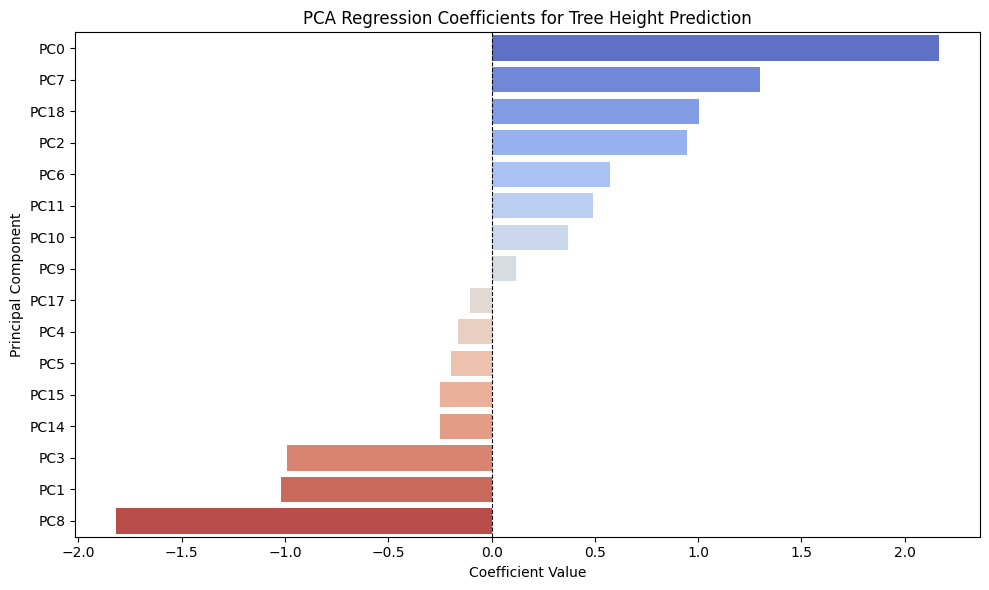

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Coefficients from your reduced model (14 components)
# You can replace these with your actual values
coefficients = {
    'PC0': 2.1653,
    'PC1': -1.0213,
    'PC2': 0.9439,
    'PC3': -0.9919,
    'PC4': -0.1650,
    'PC5': -0.1966,
    'PC6': 0.5753,
    'PC7': 1.2989,
    'PC8': -1.8170,
    'PC9': 0.1190,
    'PC10': 0.3708,
    'PC11': 0.4902,
    'PC14': -0.2507,
    'PC15': -0.2507,
    'PC17': -0.1044,
    'PC18': 1.0021
}

# Convert to DataFrame for easy plotting
coef_df = pd.DataFrame.from_dict(coefficients, orient='index', columns=['Coefficient'])
coef_df.index.name = 'Principal Component'
coef_df = coef_df.reset_index().sort_values('Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Principal Component', data=coef_df, palette='coolwarm')

plt.title('PCA Regression Coefficients for Tree Height Prediction')
plt.xlabel('Coefficient Value')
plt.ylabel('Principal Component')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()

## K-Means

In [83]:
df_pca_reduced.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.45,0.98,0.59,-0.47,-0.60,-0.52,-0.29,-1.54,0.84,-0.11,-0.83,-0.94,-0.09,-0.02,-0.12,3.39,-0.65,-0.47,-0.13
1,-1.32,2.43,1.69,-0.81,-0.58,-0.92,-0.12,-1.50,0.37,0.15,-1.06,-0.88,-0.11,-0.05,-0.13,3.42,-0.25,-0.46,0.11
2,0.45,0.98,0.59,-0.47,-0.60,-0.52,-0.29,-1.54,0.84,-0.11,-0.83,-0.94,-0.09,-0.02,-0.12,3.39,-0.65,-0.47,-0.13
3,-1.69,0.47,0.11,-1.04,-2.03,-1.01,0.72,-1.69,0.69,-1.24,-0.18,-1.14,-0.06,0.03,-0.09,3.42,-1.75,-0.58,0.25
4,-1.32,2.43,1.69,-0.81,-0.58,-0.92,-0.12,-1.50,0.37,0.15,-1.06,-0.88,-0.11,-0.05,-0.13,3.42,-0.25,-0.46,0.11


In [84]:
column_names = df_pca_reduced.columns.tolist()
print(column_names)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [85]:
df_pca_reduced.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19']

In [86]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

variables = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19']
data_selected = df_pca_reduced[variables]

In [87]:
df = pd.DataFrame(df_scaled)

# Compute Case Processing Summary
total_cases = df.shape[0]
missing_cases = df.isnull().any(axis=1).sum()
usable_cases = total_cases - missing_cases

# Create the summary table
summary = {
    "Total Cases": [total_cases],
    "Missing Cases": [missing_cases],
    "Usable Cases": [usable_cases],
}
summary_table = pd.DataFrame(summary)

# Display the table
print(summary_table)

   Total Cases  Missing Cases  Usable Cases
0        14068              0         14068


In [88]:
import numpy as np
linkage_matrix = linkage(data_selected, method='ward', metric='euclidean')
# Extract information from the linkage matrix
n_observations = data_selected.shape[0]
stage = np.arange(1, n_observations)  # Stage number

cluster_combined = linkage_matrix[:, :2].astype(int)  # Combined clusters
agglomeration_coefficients = linkage_matrix[:, 2]  # Agglomeration coefficient
cluster_sizes = linkage_matrix[:, 3].astype(int)  # Size of the resulting cluster

# Determine when each cluster first appeared
stage_first_appear = []
for i, (c1, c2) in enumerate(cluster_combined):
    c1_appearance = 0 if c1 < n_observations else stage_first_appear[c1 - n_observations]
    c2_appearance = 0 if c2 < n_observations else stage_first_appear[c2 - n_observations]
    stage_first_appear.append([c1_appearance, c2_appearance])

# Determine the next stage for each cluster
next_stage = [-1] * (n_observations - 1)  # Initialize with -1 (no next stage)
for i, (c1, c2) in enumerate(cluster_combined):
    if c1 >= n_observations:
        next_stage[c1 - n_observations] = i + 1
    if c2 >= n_observations:
        next_stage[c2 - n_observations] = i + 1

# Compile the Agglomeration Schedule into a DataFrame
agglomeration_schedule = pd.DataFrame({
    "Stage": stage,
    "Cluster Combined 1": cluster_combined[:, 0],
    "Cluster Combined 2": cluster_combined[:, 1],
    "Agglomeration Coefficient": agglomeration_coefficients,
    "Cluster 1 First Appear": [x[0] for x in stage_first_appear],
    "Cluster 2 First Appear": [x[1] for x in stage_first_appear],
    "Next Stage": next_stage
})

# Display the schedule
import pandas as pd

# Set Pandas options to display the full DataFrame
#pd.set_option('display.max_rows', None)  # Show all rows
#pd.set_option('display.max_columns', None)  # Show all columns
#pd.set_option('display.width', None)  # Adjust the display width to avoid wrapping
#pd.set_option('display.max_colwidth', None)  # Prevent truncating column contents

# Display the full DataFrame
agglomeration_schedule.head(10)

,Stage,Cluster Combined 1,Cluster Combined 2,Agglomeration Coefficient,Cluster 1 First Appear,Cluster 2 First Appear,Next Stage
0,1,0,2,0.00,0,0,3
1,2,1,4,0.00,0,0,5
2,3,5,14068,0.00,0,"[0, 0]",6
3,4,3,14,0.00,0,0,9987
4,5,6,14069,0.00,0,"[0, 0]",7
5,6,8,14070,0.00,0,"[0, [0, 0]]",9
6,7,7,14072,0.00,0,"[0, [0, 0]]",8
7,8,9,14074,0.00,0,"[0, [0, [0, 0]]]",10
8,9,10,14073,0.00,0,"[0, [0, [0, 0]]]",11
9,10,11,14075,0.00,0,"[0, [0, [0, [0, 0]]]]",12


In [89]:
# Create the dendrogram with corrected orientation
#plt.figure(figsize=(10, 7))
#dendrogram(linkage_matrix, labels=data.tolist(), orientation='top')
#plt.title("Dendrogram (Ward's Method)")
#plt.xlabel("Cases")
#plt.ylabel("Distance")
#plt.show()

In [90]:
from scipy.cluster.hierarchy import fcluster

# Assign cluster membership (5 clusters)
num_clusters = 5
cluster_membership = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
# Add cluster membership as a new column
df_pca_reduced['CLU5_1'] = cluster_membership

In [91]:
# Create a frequency table for the cluster membership
frequency_table = df_pca_reduced['CLU5_1'].value_counts().reset_index()
frequency_table.columns = ['Cluster', 'Frequency']
frequency_table.sort_values('Cluster', inplace=True)

# Display the frequency table
print(frequency_table)

   Cluster  Frequency
3        1        873
4        2        802
0        3       9836
1        4       1596
2        5        961


In [92]:
# Calculate cluster centers
cluster_centers = df_pca_reduced.groupby("CLU5_1")[variables].mean()

# Calculate the total mean for all variables
total_mean = df_pca_reduced[variables].mean()

# Add the total mean as a new row labeled "Total"
cluster_centers.loc['Total'] = total_mean

# Display the updated cluster centers with the total mean row
print("Cluster Centers (Means) with Total Mean:")
print(cluster_centers)

Cluster Centers (Means) with Total Mean:
          x1    x2    x3    x4    x5    x6    x7    x8    x9   x10   x11  \
CLU5_1                                                                     
1       1.60 -0.09 -0.11 -0.39  0.08 -0.09 -0.63 -0.07 -0.47 -1.45 -0.29   
2       1.43  0.05 -0.12 -0.15 -0.25  0.40 -0.64 -0.17  0.11  0.33  2.60   
3       0.22  0.27  0.13  0.21 -0.05 -0.16  0.34  0.03  0.07  0.07 -0.16   
4      -1.83 -1.77 -0.51  0.20 -0.57 -0.44 -1.28 -0.33 -0.20  0.46 -0.35   
5      -1.81  0.17 -0.30 -2.04  1.57  2.12 -0.27  0.45 -0.09 -0.45  0.34   
Total   0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00  0.00  0.00 -0.00  0.00   

         x12   x13   x14   x15   x16   x17   x18   x19  
CLU5_1                                                  
1       0.34  1.16 -2.38  0.25  0.33  0.91  0.90 -1.11  
2      -0.17 -0.09  1.32 -0.30  0.90  1.99  0.02  0.88  
3      -0.06 -0.12  0.09 -0.03 -0.12 -0.23 -0.06  0.02  
4       0.43  0.09  0.03  0.04  0.14  0.20 -0.19  0.01  
5      -

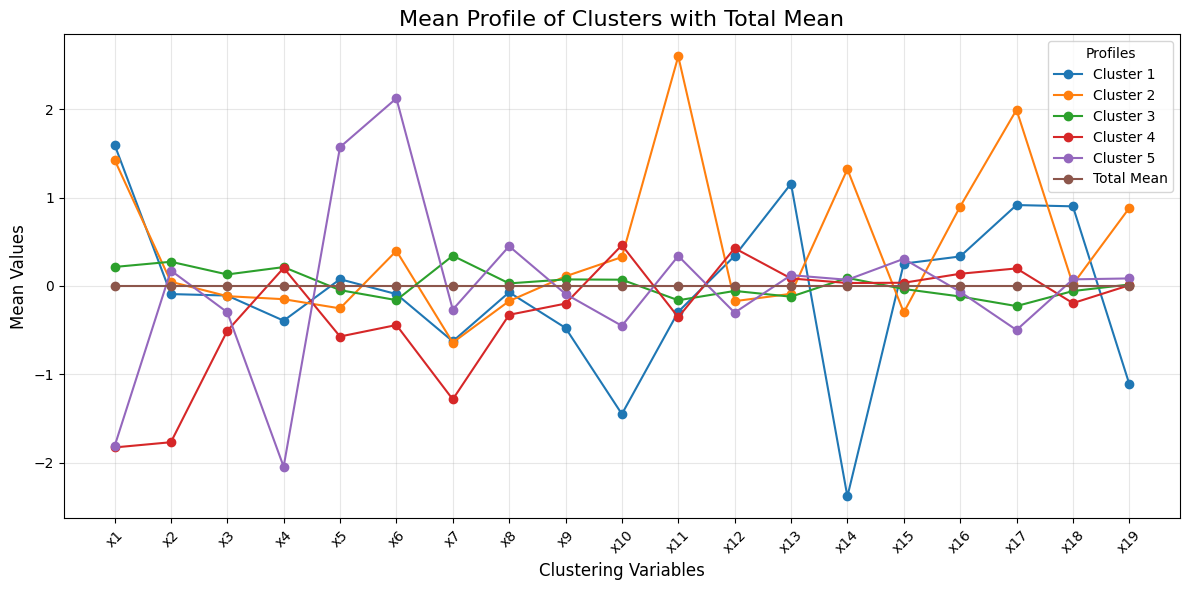

In [93]:
import matplotlib.pyplot as plt

# Transpose the cluster_centers DataFrame for easier plotting
cluster_centers_transposed = cluster_centers.T

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each cluster's mean profile
for cluster in cluster_centers_transposed.columns:
    plt.plot(
        cluster_centers_transposed.index,
        cluster_centers_transposed[cluster],
        marker='o',
        label=f"Cluster {cluster}" if cluster != 'Total' else "Total Mean"
    )

# Customize the plot
plt.title("Mean Profile of Clusters with Total Mean", fontsize=16)
plt.xlabel("Clustering Variables", fontsize=12)
plt.ylabel("Mean Values", fontsize=12)
plt.xticks(fontsize=10, rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title="Profiles", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Display the plot
plt.show()

In [94]:
# Calculate the total mean for all variables
cluster_means = df_pca_reduced.groupby("CLU5_1")[variables].mean()
hclust_means = pd.DataFrame(cluster_means)

# Display the DataFrame
print("Hierarchical Cluster Means (Initial Seeds):")
print(hclust_means)

Hierarchical Cluster Means (Initial Seeds):
          x1    x2    x3    x4    x5    x6    x7    x8    x9   x10   x11  \
CLU5_1                                                                     
1       1.60 -0.09 -0.11 -0.39  0.08 -0.09 -0.63 -0.07 -0.47 -1.45 -0.29   
2       1.43  0.05 -0.12 -0.15 -0.25  0.40 -0.64 -0.17  0.11  0.33  2.60   
3       0.22  0.27  0.13  0.21 -0.05 -0.16  0.34  0.03  0.07  0.07 -0.16   
4      -1.83 -1.77 -0.51  0.20 -0.57 -0.44 -1.28 -0.33 -0.20  0.46 -0.35   
5      -1.81  0.17 -0.30 -2.04  1.57  2.12 -0.27  0.45 -0.09 -0.45  0.34   

         x12   x13   x14   x15   x16   x17   x18   x19  
CLU5_1                                                  
1       0.34  1.16 -2.38  0.25  0.33  0.91  0.90 -1.11  
2      -0.17 -0.09  1.32 -0.30  0.90  1.99  0.02  0.88  
3      -0.06 -0.12  0.09 -0.03 -0.12 -0.23 -0.06  0.02  
4       0.43  0.09  0.03  0.04  0.14  0.20 -0.19  0.01  
5      -0.30  0.12  0.07  0.31 -0.07 -0.50  0.07  0.09  


In [95]:
from sklearn.cluster import KMeans

# Extract centroids from the hierarchical solution
initial_centroids = hclust_means[variables].values

In [96]:
# Perform K-means clustering with predefined initial centroids
kmeans = KMeans(n_clusters=5, init=initial_centroids, n_init='auto', random_state=42)
df_pca_reduced['QCL_1'] = kmeans.fit_predict(df_pca_reduced[variables])

# Display the assigned clusters
print("K-means Cluster Assignments:")
print(df_pca_reduced[['QCL_1']].head())

K-means Cluster Assignments:
   QCL_1
0      2
1      2
2      2
3      2
4      2


In [97]:
# Perform K-means clustering with predefined initial centroids
kmeans = KMeans(n_clusters=5, init=initial_centroids, n_init='auto', random_state=42)
df_pca_reduced['QCL_1'] = kmeans.fit_predict(df_pca_reduced[variables])

# Display the assigned clusters
print("K-means Cluster Assignments:")
print(df_pca_reduced[['QCL_1']].head())

K-means Cluster Assignments:
   QCL_1
0      2
1      2
2      2
3      2
4      2


In [98]:
# Final cluster centers (in standardized space)
final_centers = kmeans.cluster_centers_

# Create a DataFrame for easier inspection
final_centers_df = pd.DataFrame(final_centers, columns=variables)
final_centers_transposed = final_centers_df.T
print("Final Cluster Centers:")
print(final_centers_transposed)

Final Cluster Centers:
        0     1     2     3     4
x1   1.56  1.43  0.23 -1.83 -1.79
x2  -0.08  0.05  0.27 -1.73  0.19
x3  -0.14 -0.12  0.15 -0.57 -0.32
x4  -0.34 -0.15  0.22  0.20 -2.01
x5   0.13 -0.25 -0.06 -0.57  1.52
x6  -0.12  0.40 -0.16 -0.50  2.14
x7  -0.60 -0.64  0.34 -1.28 -0.13
x8  -0.06 -0.17  0.01 -0.23  0.47
x9  -0.54  0.11  0.07 -0.13 -0.10
x10 -1.52  0.33  0.07  0.45 -0.33
x11 -0.36  2.60 -0.15 -0.34  0.25
x12  0.34 -0.17 -0.06  0.44 -0.30
x13  1.15 -0.09 -0.13  0.09  0.12
x14 -2.38  1.32  0.10  0.03  0.06
x15  0.25 -0.30 -0.04  0.02  0.32
x16  0.34  0.90 -0.12  0.14 -0.06
x17  0.93  1.99 -0.24  0.19 -0.37
x18  0.87  0.02 -0.06 -0.21  0.13
x19 -1.00  0.88  0.01  0.01  0.08


In [99]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway

# Initialize results dictionary for ANOVA
anova_results = {
    "Variable": [],
    "Cluster Mean Square": [],
    "Cluster df": [],
    "Error Mean Square": [],
    "Error df": [],
    "F": [],
    "Sig.": []
}
num_clusters = 5
# Perform ANOVA for each variable
for variable in variables:
    # Group data by cluster
    # groups = [data[data['kmeans_cluster'] == cluster][variable] for cluster in range(0, num_clusters - 1)]
    group1 = df_pca_reduced[df_pca_reduced['QCL_1'] == 0][variable]
    group2 = df_pca_reduced[df_pca_reduced['QCL_1'] == 1][variable]
    group3 = df_pca_reduced[df_pca_reduced['QCL_1'] == 2][variable]
    group4 = df_pca_reduced[df_pca_reduced['QCL_1'] == 3][variable]
    group5 = df_pca_reduced[df_pca_reduced['QCL_1'] == 4][variable]
    # Perform ANOVA
    f_stat, p_value = f_oneway(group1, group2, group3, group4, group5)

    # Calculate degrees of freedom
    cluster_df = num_clusters - 1
    error_df = len(df_pca_reduced) - num_clusters

    # Calculate Cluster Mean Square
    overall_mean = df_pca_reduced[variable].mean()
    cluster_mean_square = (
        sum([(len(group) * (group.mean() - overall_mean) ** 2) for group in [group1, group2, group3, group4, group5]])
        / cluster_df
    )

    # Calculate Error Mean Square
    error_mean_square = (
        sum([((group - group.mean()) ** 2).sum() for group in [group1, group2, group3, group4, group5]]) / error_df
    )

    # Append results
    anova_results["Variable"].append(variable)
    anova_results["Cluster Mean Square"].append(cluster_mean_square)
    anova_results["Cluster df"].append(cluster_df)
    anova_results["Error Mean Square"].append(error_mean_square)
    anova_results["Error df"].append(error_df)
    anova_results["F"].append(f_stat)
    anova_results["Sig."].append(p_value)

# Convert results to a DataFrame
anova_df = pd.DataFrame(anova_results)

# Display the ANOVA table
print("\nANOVA Table:")
print(anova_df)


ANOVA Table:
   Variable  Cluster Mean Square  Cluster df  Error Mean Square  Error df  \
0        x1              3275.75           4               1.09     14063   
1        x2              1410.60           4               1.21     14063   
2        x3               220.14           4               1.35     14063   
3        x4              1207.04           4               1.02     14063   
4        x5               746.66           4               1.11     14063   
5        x6              1377.97           4               0.88     14063   
6        x7              1110.52           4               0.94     14063   
7        x8                85.46           4               1.14     14063   
8        x9                89.04           4               1.12     14063   
9       x10               669.66           4               0.93     14063   
10      x11              1497.75           4               0.67     14063   
11      x12               143.71           4               1.0

In [100]:
# Create a frequency table for the cluster membership
frequency_table = df_pca_reduced['QCL_1'].value_counts().reset_index()
frequency_table.columns = ['Cluster', 'Frequency']
frequency_table.sort_values('Cluster', inplace=True)

# Display the frequency table
print("Number of cases in each cluster:")
print(frequency_table)

Number of cases in each cluster:
   Cluster  Frequency
3        0        902
4        1        802
0        2       9712
1        3       1627
2        4       1025


In [101]:
print("Final Cluster Centers:")
print(final_centers_transposed)

Final Cluster Centers:
        0     1     2     3     4
x1   1.56  1.43  0.23 -1.83 -1.79
x2  -0.08  0.05  0.27 -1.73  0.19
x3  -0.14 -0.12  0.15 -0.57 -0.32
x4  -0.34 -0.15  0.22  0.20 -2.01
x5   0.13 -0.25 -0.06 -0.57  1.52
x6  -0.12  0.40 -0.16 -0.50  2.14
x7  -0.60 -0.64  0.34 -1.28 -0.13
x8  -0.06 -0.17  0.01 -0.23  0.47
x9  -0.54  0.11  0.07 -0.13 -0.10
x10 -1.52  0.33  0.07  0.45 -0.33
x11 -0.36  2.60 -0.15 -0.34  0.25
x12  0.34 -0.17 -0.06  0.44 -0.30
x13  1.15 -0.09 -0.13  0.09  0.12
x14 -2.38  1.32  0.10  0.03  0.06
x15  0.25 -0.30 -0.04  0.02  0.32
x16  0.34  0.90 -0.12  0.14 -0.06
x17  0.93  1.99 -0.24  0.19 -0.37
x18  0.87  0.02 -0.06 -0.21  0.13
x19 -1.00  0.88  0.01  0.01  0.08
